# 시계열 데이터 다루기

## datetime 모듈

- 공식 문서: https://docs.python.org/3/library/datetime.html

In [1]:
import datetime

In [4]:
# 날짜 데이터 만들기(년월일) - date()

datetime.date(2023, 4, 17)

datetime.date(2023, 4, 17)

In [5]:
datetime.date(2023, 4, 17, 10, 10, 25)

#에러

#datetime.date(year, month, day)

TypeError: ignored

In [6]:
# 날짜 + 시간 데이터 만들기 - datetime()

#datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None, *, fold=0)

#year, month, day arguments are required

time2023 = datetime.datetime(2023, 4, 17, 10, 10, 25) #2023년 4월 17일 10시 10분 25초

print(time2023)

2023-04-17 10:10:25


In [7]:
print(time2023.date())
print(time2023.year)
print(time2023.month)
print(time2023.day)
print(time2023.hour)
print(time2023.minute)
print(time2023.second)

2023-04-17
2023
4
17
10
10
25


In [8]:
#요일
time2023.weekday()

0

## 요일별 출력값

* 0 - 월요일
* 1 - 화요일
* 2 - 수요일
* 3 - 목요일
* 4 - 금요일
* 5 - 토요일
* 6 - 일요일

In [9]:
datetime.datetime.now() 

datetime.datetime(2023, 4, 16, 23, 42, 52, 47654)

## 타임존 이름 리스트 

- https://gist.github.com/heyalexej/8bf688fd67d7199be4a1682b3eec7568

In [10]:
#시간대 (timezone)

import pytz

In [11]:
seoul = pytz.timezone('Asia/Seoul')

print('Asia/Seoul :', datetime.datetime.now().astimezone(seoul))

korea = pytz.timezone('ROK')

print('ROK        :', datetime.datetime.now().astimezone(korea))

Asia/Seoul : 2023-04-17 09:06:03.452549+09:00
ROK        : 2023-04-17 09:06:03.454969+09:00


In [12]:
korea = pytz.timezone('ROK')
print('현재 한국 시간   :', datetime.datetime.now().astimezone(korea))

London = pytz.timezone('Europe/London')
print('현재 영국 시간   :', datetime.datetime.now().astimezone(London))

현재 한국 시간   : 2023-04-17 09:06:36.981363+09:00
현재 영국 시간   : 2023-04-17 01:06:36.986215+01:00


In [13]:
sk = datetime.datetime.now().astimezone(korea)

uk = datetime.datetime.now().astimezone(London)

hour_diff = sk.hour - uk.hour

hour_diff

8

In [14]:
sk.tzinfo

<DstTzInfo 'ROK' KST+9:00:00 STD>

In [15]:
print(f"한국과 영국은 {hour_diff} 시간 차이가 납니다")

한국과 영국은 8 시간 차이가 납니다


<img src = "https://mblogthumb-phinf.pstatic.net/20160406_269/tars17_1459888454865kPHGD_JPEG/%BF%B5%B1%B9%BD%C3%C2%F7.jpg?type=w800">

## strftime( ) & strptime( ) 포맷 코드


- strftime : string from time
- strptime : time from parsed string
- Python `strftime` cheatsheet : https://strftime.org/



In [16]:
#strftime

sk.strftime('%A')

'Monday'

In [17]:
print(sk.strftime("%A, %B, %Y, %H, %p, %M, %Z, %c, %x"))

Monday, April, 2023, 09, AM, 06, KST, Mon Apr 17 09:06:37 2023, 04/17/23


In [18]:
#strptime

datetime.datetime.strptime('1995/11/24', '%Y/%m/%d') #주어진 시간에 따른 포맷을 명시해줘야

datetime.datetime(1995, 11, 24, 0, 0)

In [ ]:
datetime.datetime.strptime('95.Nov.24', '%y.%b.%d')

## timestamp (unix timestamp)

- UTC (Coordinated Universal Time) 기준 1970년 1월 1일 1부터의 시간을 초수로 나타낸 것

- UTC = 표준 시간
- GMT (Greenwich Mean Time) = 시간대 (Zulu time으로도 불림)
- 영국 시간은 GMT와 일치하나, 섬머타임 기간에는 GMT+1
- 변환기: https://www.epochconverter.com/ 
<br>
<img src = "https://24timezones.com/cms-static/images/uploads/time-zone2-min.jpg" width = 700>

In [19]:
import time

In [20]:
time.time()

1681690075.5564966

In [21]:
int(time.time())

1681690076

In [23]:
#한국 현재 시간을 유닉스 타임으로

import datetime
import pytz

korea = pytz.timezone('ROK')

sk = datetime.datetime.now().astimezone(korea)

sk.timestamp() 

1681690088.397157

In [24]:
# 유닉스 타임을 시간 (datetime) 포맷으로

ts = 1681630779.86133

easy_utc = datetime.datetime.fromtimestamp(ts)

easy_sk = datetime.datetime.fromtimestamp(ts).astimezone(korea)

print(easy_utc)

print(easy_sk)

2023-04-16 07:39:39.861330
2023-04-16 16:39:39.861330+09:00


# 데이터프레임에서 시계열 데이터 다루기

In [25]:
import pandas as pd

# 공기 중 Nitrogen Dioxide (NO2) 데이터
#https://github.com/pandas-dev/pandas/tree/main/doc

url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv' #깃허브에서 데이터 바로 가져오기
df = pd.read_csv(url, index_col=0)
print(df.head(5))

      country                   date.utc location parameter  value   unit
city                                                                     
Paris      FR  2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
Paris      FR  2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
Paris      FR  2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
Paris      FR  2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
Paris      FR  2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


In [26]:
type(df["date.utc"][0]) #시계열 데이터가 아님

str

In [27]:
df['date.utc_dt1'] = pd.to_datetime(df['date.utc']) #시계열 데이터로 변환 (방법 1)

In [28]:
df['date.utc_dt2'] = df['date.utc'].apply(pd.to_datetime) #시계열 데이터로 변환 (방법 2)

In [29]:
df.head(5)

,country,date.utc,location,parameter,value,unit,date.utc_dt1,date.utc_dt2
city,,,,,,,,
Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,2019-06-21 00:00:00+00:00,2019-06-21 00:00:00+00:00
Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,2019-06-20 23:00:00+00:00,2019-06-20 23:00:00+00:00
Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,2019-06-20 22:00:00+00:00,2019-06-20 22:00:00+00:00
Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,2019-06-20 21:00:00+00:00,2019-06-20 21:00:00+00:00
Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,2019-06-20 20:00:00+00:00,2019-06-20 20:00:00+00:00


In [30]:
#시계열 데이터로 잘 변환되었는지 확인

type(df["date.utc_dt1"][0]) 

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
#시계열 데이터로 잘 변환되었는지 확인

type(df["date.utc_dt2"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
#칼럼 이름 쉬운 것으로 바꾸기

df.rename(columns={'date.utc_dt1':'time'}, inplace=True)

df.head(5)

,country,date.utc,location,parameter,value,unit,time,date.utc_dt2
city,,,,,,,,
Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,2019-06-21 00:00:00+00:00,2019-06-21 00:00:00+00:00
Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,2019-06-20 23:00:00+00:00,2019-06-20 23:00:00+00:00
Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,2019-06-20 22:00:00+00:00,2019-06-20 22:00:00+00:00
Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,2019-06-20 21:00:00+00:00,2019-06-20 21:00:00+00:00
Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,2019-06-20 20:00:00+00:00,2019-06-20 20:00:00+00:00


In [33]:
#칼럼 삭제하기

df = df.drop('date.utc_dt2', axis = 1) #axis = 1, 즉 칼럼을 따라 (along the column) 삭제하라 

df.head(5)

,country,date.utc,location,parameter,value,unit,time
city,,,,,,,
Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,2019-06-21 00:00:00+00:00
Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,2019-06-20 23:00:00+00:00
Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,2019-06-20 22:00:00+00:00
Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,2019-06-20 21:00:00+00:00
Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,2019-06-20 20:00:00+00:00


In [34]:
#월 칼럼 만들기

df['월'] = df['time'].dt.month

df.head(5)

,country,date.utc,location,parameter,value,unit,time,월
city,,,,,,,,
Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,2019-06-21 00:00:00+00:00,6
Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,2019-06-20 23:00:00+00:00,6
Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,2019-06-20 22:00:00+00:00,6
Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,2019-06-20 21:00:00+00:00,6
Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,2019-06-20 20:00:00+00:00,6


In [35]:
#요일 칼럼 만들기

df['요일'] = df['time'].dt.weekday

df.head(5)

,country,date.utc,location,parameter,value,unit,time,월,요일
city,,,,,,,,,
Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,2019-06-21 00:00:00+00:00,6,4
Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,2019-06-20 23:00:00+00:00,6,3
Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,2019-06-20 22:00:00+00:00,6,3
Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,2019-06-20 21:00:00+00:00,6,3
Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,2019-06-20 20:00:00+00:00,6,3


In [36]:
#시간 칼럼 만들기

df['시간'] = df['time'].dt.hour

df.head(5)

,country,date.utc,location,parameter,value,unit,time,월,요일,시간
city,,,,,,,,,,
Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,2019-06-21 00:00:00+00:00,6,4,0
Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,2019-06-20 23:00:00+00:00,6,3,23
Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,2019-06-20 22:00:00+00:00,6,3,22
Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,2019-06-20 21:00:00+00:00,6,3,21
Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,2019-06-20 20:00:00+00:00,6,3,20


In [37]:
df['시간'].value_counts()

1     109
2      94
7      88
8      88
9      88
6      87
10     86
21     86
13     85
23     85
0      85
14     85
15     85
18     85
19     85
20     85
11     85
16     84
17     84
12     84
4      83
5      82
3      82
22     78
Name: 시간, dtype: int64

In [38]:
#요일별, 도시별 NO2 평균 수치

df.groupby(["월", "요일", 'country', 'city'])['value'].mean()

월  요일  country  city     
5  0   BE       Antwerpen    23.000000
       FR       Paris        22.811111
       GB       London       26.944444
   1   BE       Antwerpen    24.666667
       FR       Paris        28.887368
       GB       London       26.173913
   2   BE       Antwerpen    22.166667
       FR       Paris        28.206250
       GB       London       25.382979
   3   BE       Antwerpen    27.300000
       FR       Paris        28.836842
       GB       London       29.768421
   4   BE       Antwerpen    26.375000
       FR       Paris        32.509375
       GB       London       28.936842
   5   BE       Antwerpen    33.200000
       FR       Paris        28.574242
       GB       London       32.134328
   6   BE       Antwerpen    21.574074
       FR       Paris        23.347222
       GB       London       28.680556
6  0   BE       Antwerpen    38.166667
       FR       Paris        26.901389
       GB       London       20.400000
   1   BE       Antwerpen     7.500000

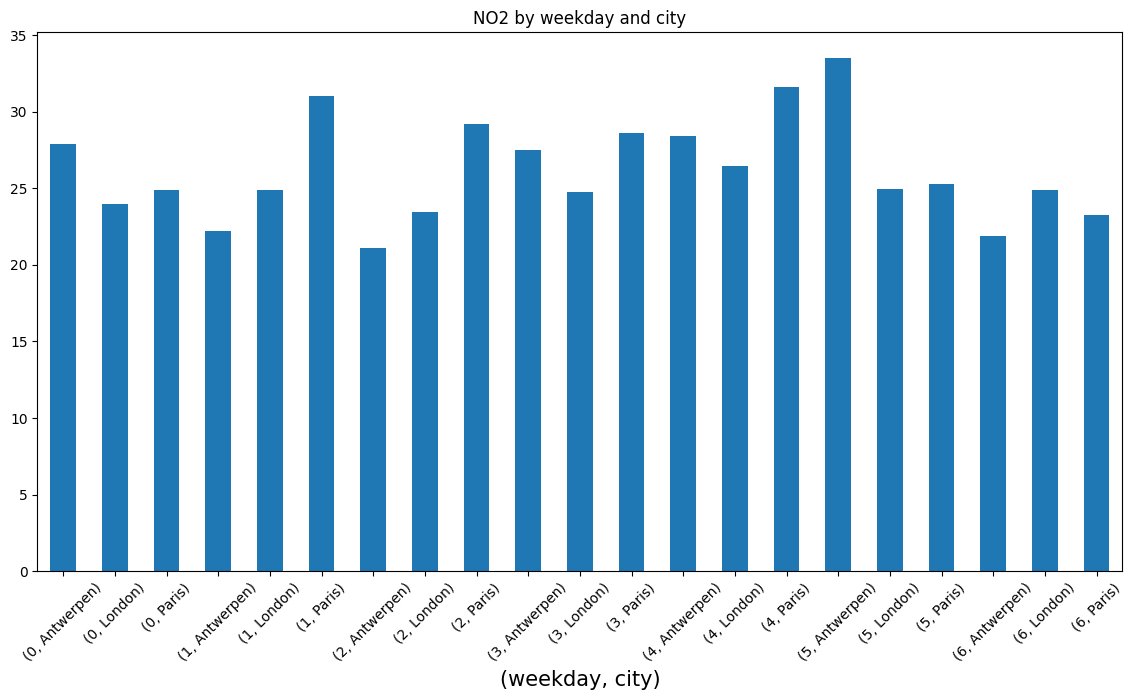

In [39]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(14, 7))

df.groupby(["요일", 'city'])['value'].mean().plot(kind = 'bar', rot = 45)

plt.xlabel("(weekday, city)", fontsize = 15)

plt.title("NO2 by weekday and city")

plt.show()